In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
n_sensors = 10
#n_sensors = 15

In [3]:
os.chdir('E:\\MLdataset')

In [4]:
x_csv = pd.read_csv('x_5degree_1rev.csv',header=None)

In [5]:
x_csv = x_csv.to_numpy(dtype='float32')

In [6]:
x_5degree = x_csv[:, 0:10]

In [7]:
x_5degree.shape

(438, 10)

In [8]:
x = x_5degree.reshape((73*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(1rev_5deg).csv',header=None)

In [10]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [11]:
y = y_5degree.reshape((73*6, 100, 100))

In [12]:
tsr = x_csv[:, -2]

In [13]:
theta = x_csv[:, -1]

In [14]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [15]:
print(y_train.shape)

(394, 100, 100)


In [16]:
print(y_test.shape)

(44, 100, 100)


In [17]:
print(x_train.shape)

(394, 10, 1)


In [18]:
print(x_test.shape)

(44, 10, 1)


In [19]:
theta_train

array([ 40., 165.,  55., 325.,  20., 155.,  90.,  75.,  75., 265.,   0.,
        95., 305., 350., 280.,   5., 245., 100., 185., 330., 325.,  30.,
       125.,   0., 255., 200., 210.,  95., 250., 230., 100., 255.,  65.,
       110., 230.,  85., 130., 215., 300., 285., 320., 120.,  85., 330.,
       230., 205., 155.,  55.,  65., 135., 105.,  40., 320.,  30., 315.,
       265., 270.,  25., 225.,  10., 315.,  60., 280.,  80., 195., 220.,
       220.,  15.,  90., 110., 300., 110., 320., 315., 185., 290., 330.,
       145., 335., 325.,  50., 130.,  35., 150., 160., 175., 130., 215.,
       225., 205., 340., 315., 160., 210., 260., 305., 120., 145., 300.,
       170., 265., 180., 330., 360.,  90.,  80., 165.,  50., 210., 130.,
         5., 295., 110., 230., 245., 115., 235., 140., 310., 245.,  45.,
       220.,  15., 180., 330., 140., 190., 100., 170., 295., 190., 250.,
       310.,  30., 120.,  50.,  60.,  20., 155.,  50.,  60., 150.,  40.,
       150., 275., 105., 225., 200., 150.,  60., 32

In [20]:
tsr_train

array([1.7, 1.5, 1.7, 1.9, 1.6, 1.8, 2. , 1.5, 2. , 1.6, 1.5, 1.5, 1.8,
       1.8, 1.5, 1.8, 1.9, 1.6, 1.9, 1.8, 1.8, 2. , 1.5, 2. , 2. , 1.6,
       1.5, 1.7, 2. , 2. , 1.9, 1.6, 1.9, 1.5, 1.5, 1.6, 1.8, 1.6, 2. ,
       1.5, 1.6, 1.5, 1.5, 1.5, 1.8, 2. , 1.5, 1.6, 2. , 1.7, 1.6, 1.8,
       2. , 1.7, 1.9, 1.8, 2. , 1.5, 1.5, 1.7, 2. , 2. , 1.8, 1.5, 2. ,
       1.6, 2. , 1.5, 1.5, 1.7, 1.5, 1.9, 1.9, 1.5, 1.6, 1.8, 1.9, 1.5,
       1.6, 1.7, 1.8, 1.5, 1.5, 1.7, 2. , 1.6, 1.9, 2. , 1.6, 1.6, 1.6,
       1.7, 1.9, 1.9, 1.7, 2. , 2. , 1.9, 1.9, 1.7, 1.7, 1.6, 2. , 1.6,
       1.8, 2. , 2. , 1.6, 2. , 1.7, 1.6, 1.9, 2. , 1.6, 2. , 2. , 1.7,
       1.8, 1.8, 1.7, 1.9, 1.9, 1.8, 1.5, 1.6, 1.9, 1.7, 1.8, 1.8, 1.5,
       1.6, 1.7, 1.7, 1.5, 1.9, 1.9, 1.7, 1.7, 1.7, 1.5, 1.8, 1.6, 1.6,
       1.8, 1.8, 1.7, 2. , 2. , 1.9, 1.9, 1.7, 1.7, 1.6, 2. , 1.7, 1.7,
       1.7, 1.5, 1.6, 1.5, 2. , 1.6, 1.9, 1.6, 1.6, 1.9, 1.8, 1.6, 2. ,
       1.5, 1.5, 1.5, 1.6, 1.6, 2. , 1.7, 1.7, 1.5, 2. , 1.8, 2.

In [21]:
os.chdir('C:\\Users\\User')

In [22]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [23]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 reshape (Reshape)           (None, 10)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               5632      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             513000

In [24]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [25]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
10/10 [==============================] - 1s 6ms/step - loss: 0.0110 - rmse: 0.1041
Epoch 2/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0109 - rmse: 0.1035
Epoch 3/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0107 - rmse: 0.1028
Epoch 4/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0105 - rmse: 0.1015
Epoch 5/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0099 - rmse: 0.0987
Epoch 6/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0088 - rmse: 0.0928
Epoch 7/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0077 - rmse: 0.0868
Epoch 8/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0844
Epoch 9/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0836
Epoch 10/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0070 - rmse: 0.0830
Epoch 11/10000
10/10 [=======

10/10 [==============================] - 0s 6ms/step - loss: 7.5324e-04 - rmse: 0.0242
Epoch 167/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4727e-04 - rmse: 0.0241
Epoch 168/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3971e-04 - rmse: 0.0239
Epoch 169/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3386e-04 - rmse: 0.0238
Epoch 170/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2207e-04 - rmse: 0.0236
Epoch 171/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1375e-04 - rmse: 0.0234
Epoch 172/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0682e-04 - rmse: 0.0232
Epoch 173/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0128e-04 - rmse: 0.0231
Epoch 174/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9410e-04 - rmse: 0.0230
Epoch 175/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8977e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 2.8432e-04 - rmse: 0.0111
Epoch 325/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8494e-04 - rmse: 0.0111
Epoch 326/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8366e-04 - rmse: 0.0110
Epoch 327/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8239e-04 - rmse: 0.0110
Epoch 328/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8149e-04 - rmse: 0.0109
Epoch 329/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7991e-04 - rmse: 0.0109
Epoch 330/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7870e-04 - rmse: 0.0108
Epoch 331/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7807e-04 - rmse: 0.0108
Epoch 332/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7663e-04 - rmse: 0.0107
Epoch 333/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7552e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 1.9396e-04 - rmse: 0.0066
Epoch 483/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9362e-04 - rmse: 0.0066
Epoch 484/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9364e-04 - rmse: 0.0066
Epoch 485/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9307e-04 - rmse: 0.0065
Epoch 486/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9279e-04 - rmse: 0.0065
Epoch 487/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9207e-04 - rmse: 0.0065
Epoch 488/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9188e-04 - rmse: 0.0065
Epoch 489/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9158e-04 - rmse: 0.0065
Epoch 490/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9182e-04 - rmse: 0.0065
Epoch 491/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9166e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 1.5844e-04 - rmse: 0.0047
Epoch 641/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5849e-04 - rmse: 0.0048
Epoch 642/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5857e-04 - rmse: 0.0048
Epoch 643/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5813e-04 - rmse: 0.0047
Epoch 644/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5802e-04 - rmse: 0.0047
Epoch 645/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5788e-04 - rmse: 0.0047
Epoch 646/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5741e-04 - rmse: 0.0047
Epoch 647/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5733e-04 - rmse: 0.0047
Epoch 648/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5713e-04 - rmse: 0.0047
Epoch 649/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5697e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 1.3551e-04 - rmse: 0.0038
Epoch 799/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3528e-04 - rmse: 0.0038
Epoch 800/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3507e-04 - rmse: 0.0038
Epoch 801/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3517e-04 - rmse: 0.0038
Epoch 802/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3500e-04 - rmse: 0.0038
Epoch 803/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3488e-04 - rmse: 0.0038
Epoch 804/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3528e-04 - rmse: 0.0039
Epoch 805/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3547e-04 - rmse: 0.0039
Epoch 806/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3462e-04 - rmse: 0.0038
Epoch 807/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3444e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 1.1808e-04 - rmse: 0.0033
Epoch 957/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1791e-04 - rmse: 0.0033
Epoch 958/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1788e-04 - rmse: 0.0033
Epoch 959/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1798e-04 - rmse: 0.0033
Epoch 960/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1798e-04 - rmse: 0.0033
Epoch 961/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1782e-04 - rmse: 0.0033
Epoch 962/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1817e-04 - rmse: 0.0034
Epoch 963/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1785e-04 - rmse: 0.0033
Epoch 964/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1749e-04 - rmse: 0.0033
Epoch 965/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1730e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 1.0452e-04 - rmse: 0.0030
Epoch 1114/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0452e-04 - rmse: 0.0030
Epoch 1115/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0472e-04 - rmse: 0.0030
Epoch 1116/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0484e-04 - rmse: 0.0030
Epoch 1117/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0492e-04 - rmse: 0.0031
Epoch 1118/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0468e-04 - rmse: 0.0030
Epoch 1119/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0495e-04 - rmse: 0.0031
Epoch 1120/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0481e-04 - rmse: 0.0031
Epoch 1121/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0498e-04 - rmse: 0.0031
Epoch 1122/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 9.3988e-05 - rmse: 0.0027
Epoch 1270/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4018e-05 - rmse: 0.0027
Epoch 1271/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4518e-05 - rmse: 0.0028
Epoch 1272/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4646e-05 - rmse: 0.0029
Epoch 1273/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4184e-05 - rmse: 0.0028
Epoch 1274/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3776e-05 - rmse: 0.0027
Epoch 1275/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3459e-05 - rmse: 0.0027
Epoch 1276/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3371e-05 - rmse: 0.0027
Epoch 1277/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3194e-05 - rmse: 0.0027
Epoch 1278/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3

10/10 [==============================] - 0s 5ms/step - loss: 8.4994e-05 - rmse: 0.0025
Epoch 1426/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4964e-05 - rmse: 0.0025
Epoch 1427/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4899e-05 - rmse: 0.0025
Epoch 1428/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4735e-05 - rmse: 0.0025
Epoch 1429/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4740e-05 - rmse: 0.0025
Epoch 1430/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4583e-05 - rmse: 0.0025
Epoch 1431/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4630e-05 - rmse: 0.0025
Epoch 1432/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4533e-05 - rmse: 0.0025
Epoch 1433/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4442e-05 - rmse: 0.0025
Epoch 1434/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4

10/10 [==============================] - 0s 5ms/step - loss: 7.8220e-05 - rmse: 0.0025
Epoch 1582/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8194e-05 - rmse: 0.0025
Epoch 1583/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8013e-05 - rmse: 0.0025
Epoch 1584/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7726e-05 - rmse: 0.0024
Epoch 1585/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7593e-05 - rmse: 0.0024
Epoch 1586/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7504e-05 - rmse: 0.0024
Epoch 1587/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7431e-05 - rmse: 0.0024
Epoch 1588/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7531e-05 - rmse: 0.0024
Epoch 1589/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7399e-05 - rmse: 0.0024
Epoch 1590/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7

10/10 [==============================] - 0s 5ms/step - loss: 7.1748e-05 - rmse: 0.0023
Epoch 1738/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1665e-05 - rmse: 0.0023
Epoch 1739/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1486e-05 - rmse: 0.0023
Epoch 1740/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1486e-05 - rmse: 0.0023
Epoch 1741/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1358e-05 - rmse: 0.0023
Epoch 1742/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1223e-05 - rmse: 0.0023
Epoch 1743/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1316e-05 - rmse: 0.0023
Epoch 1744/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1298e-05 - rmse: 0.0023
Epoch 1745/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1238e-05 - rmse: 0.0023
Epoch 1746/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1

10/10 [==============================] - 0s 5ms/step - loss: 6.6646e-05 - rmse: 0.0023
Epoch 1894/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6805e-05 - rmse: 0.0023
Epoch 1895/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6658e-05 - rmse: 0.0023
Epoch 1896/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6403e-05 - rmse: 0.0022
Epoch 1897/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6495e-05 - rmse: 0.0023
Epoch 1898/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6475e-05 - rmse: 0.0023
Epoch 1899/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6780e-05 - rmse: 0.0023
Epoch 1900/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6676e-05 - rmse: 0.0023
Epoch 1901/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6512e-05 - rmse: 0.0023
Epoch 1902/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6

10/10 [==============================] - 0s 5ms/step - loss: 6.2242e-05 - rmse: 0.0022
Epoch 2050/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1967e-05 - rmse: 0.0021
Epoch 2051/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1765e-05 - rmse: 0.0021
Epoch 2052/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1752e-05 - rmse: 0.0021
Epoch 2053/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1755e-05 - rmse: 0.0021
Epoch 2054/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1771e-05 - rmse: 0.0021
Epoch 2055/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1664e-05 - rmse: 0.0021
Epoch 2056/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1698e-05 - rmse: 0.0021
Epoch 2057/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1734e-05 - rmse: 0.0021
Epoch 2058/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1

10/10 [==============================] - 0s 5ms/step - loss: 5.8414e-05 - rmse: 0.0021
Epoch 2206/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8954e-05 - rmse: 0.0022
Epoch 2207/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8917e-05 - rmse: 0.0022
Epoch 2208/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9304e-05 - rmse: 0.0023
Epoch 2209/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9382e-05 - rmse: 0.0023
Epoch 2210/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8858e-05 - rmse: 0.0022
Epoch 2211/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8486e-05 - rmse: 0.0022
Epoch 2212/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8409e-05 - rmse: 0.0021
Epoch 2213/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8298e-05 - rmse: 0.0021
Epoch 2214/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8

10/10 [==============================] - 0s 5ms/step - loss: 5.4847e-05 - rmse: 0.0020
Epoch 2362/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4830e-05 - rmse: 0.0020
Epoch 2363/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4931e-05 - rmse: 0.0020
Epoch 2364/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4777e-05 - rmse: 0.0020
Epoch 2365/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4832e-05 - rmse: 0.0020
Epoch 2366/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4854e-05 - rmse: 0.0020
Epoch 2367/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4924e-05 - rmse: 0.0020
Epoch 2368/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4966e-05 - rmse: 0.0020
Epoch 2369/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5229e-05 - rmse: 0.0021
Epoch 2370/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5

10/10 [==============================] - 0s 5ms/step - loss: 5.2156e-05 - rmse: 0.0019
Epoch 2518/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2302e-05 - rmse: 0.0020
Epoch 2519/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2221e-05 - rmse: 0.0020
Epoch 2520/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2277e-05 - rmse: 0.0020
Epoch 2521/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2280e-05 - rmse: 0.0020
Epoch 2522/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2277e-05 - rmse: 0.0020
Epoch 2523/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2299e-05 - rmse: 0.0020
Epoch 2524/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2345e-05 - rmse: 0.0020
Epoch 2525/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2306e-05 - rmse: 0.0020
Epoch 2526/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2

10/10 [==============================] - 0s 5ms/step - loss: 4.9628e-05 - rmse: 0.0019
Epoch 2674/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9646e-05 - rmse: 0.0019
Epoch 2675/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9547e-05 - rmse: 0.0019
Epoch 2676/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9499e-05 - rmse: 0.0019
Epoch 2677/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9543e-05 - rmse: 0.0019
Epoch 2678/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9524e-05 - rmse: 0.0019
Epoch 2679/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9502e-05 - rmse: 0.0019
Epoch 2680/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9812e-05 - rmse: 0.0019
Epoch 2681/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9621e-05 - rmse: 0.0019
Epoch 2682/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9

10/10 [==============================] - 0s 5ms/step - loss: 4.8040e-05 - rmse: 0.0020
Epoch 2830/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7884e-05 - rmse: 0.0020
Epoch 2831/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7736e-05 - rmse: 0.0019
Epoch 2832/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7602e-05 - rmse: 0.0019
Epoch 2833/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7638e-05 - rmse: 0.0019
Epoch 2834/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7545e-05 - rmse: 0.0019
Epoch 2835/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7510e-05 - rmse: 0.0019
Epoch 2836/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7303e-05 - rmse: 0.0018
Epoch 2837/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7338e-05 - rmse: 0.0018
Epoch 2838/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7

10/10 [==============================] - 0s 5ms/step - loss: 4.5998e-05 - rmse: 0.0019
Epoch 2986/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5914e-05 - rmse: 0.0019
Epoch 2987/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6357e-05 - rmse: 0.0020
Epoch 2988/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6155e-05 - rmse: 0.0020
Epoch 2989/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5912e-05 - rmse: 0.0019
Epoch 2990/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5956e-05 - rmse: 0.0019
Epoch 2991/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5684e-05 - rmse: 0.0019
Epoch 2992/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5463e-05 - rmse: 0.0018
Epoch 2993/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5585e-05 - rmse: 0.0019
Epoch 2994/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5

10/10 [==============================] - 0s 5ms/step - loss: 4.4755e-05 - rmse: 0.0020
Epoch 3142/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4526e-05 - rmse: 0.0020
Epoch 3143/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4724e-05 - rmse: 0.0020
Epoch 3144/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6209e-05 - rmse: 0.0024
Epoch 3145/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8997e-05 - rmse: 0.0029
Epoch 3146/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6496e-05 - rmse: 0.0024
Epoch 3147/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5439e-05 - rmse: 0.0022
Epoch 3148/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5073e-05 - rmse: 0.0021
Epoch 3149/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4336e-05 - rmse: 0.0019
Epoch 3150/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4

10/10 [==============================] - 0s 5ms/step - loss: 4.2502e-05 - rmse: 0.0018
Epoch 3298/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2665e-05 - rmse: 0.0019
Epoch 3299/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2729e-05 - rmse: 0.0019
Epoch 3300/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2489e-05 - rmse: 0.0018
Epoch 3301/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2400e-05 - rmse: 0.0018
Epoch 3302/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2555e-05 - rmse: 0.0018
Epoch 3303/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2244e-05 - rmse: 0.0018
Epoch 3304/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2153e-05 - rmse: 0.0017
Epoch 3305/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2297e-05 - rmse: 0.0018
Epoch 3306/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2

10/10 [==============================] - 0s 5ms/step - loss: 4.1045e-05 - rmse: 0.0018
Epoch 3454/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0907e-05 - rmse: 0.0017
Epoch 3455/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0968e-05 - rmse: 0.0018
Epoch 3456/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1161e-05 - rmse: 0.0018
Epoch 3457/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1048e-05 - rmse: 0.0018
Epoch 3458/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0912e-05 - rmse: 0.0017
Epoch 3459/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0917e-05 - rmse: 0.0017
Epoch 3460/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0883e-05 - rmse: 0.0017
Epoch 3461/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0798e-05 - rmse: 0.0017
Epoch 3462/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0

10/10 [==============================] - 0s 5ms/step - loss: 3.9491e-05 - rmse: 0.0017
Epoch 3610/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9544e-05 - rmse: 0.0017
Epoch 3611/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9574e-05 - rmse: 0.0017
Epoch 3612/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9717e-05 - rmse: 0.0017
Epoch 3613/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9798e-05 - rmse: 0.0018
Epoch 3614/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9807e-05 - rmse: 0.0018
Epoch 3615/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9967e-05 - rmse: 0.0018
Epoch 3616/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9815e-05 - rmse: 0.0018
Epoch 3617/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9802e-05 - rmse: 0.0018
Epoch 3618/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9

10/10 [==============================] - 0s 5ms/step - loss: 3.9035e-05 - rmse: 0.0018
Epoch 3766/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9813e-05 - rmse: 0.0020
Epoch 3767/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9464e-05 - rmse: 0.0019
Epoch 3768/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9050e-05 - rmse: 0.0018
Epoch 3769/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8807e-05 - rmse: 0.0018
Epoch 3770/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8762e-05 - rmse: 0.0018
Epoch 3771/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8796e-05 - rmse: 0.0018
Epoch 3772/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8628e-05 - rmse: 0.0017
Epoch 3773/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8760e-05 - rmse: 0.0018
Epoch 3774/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8

10/10 [==============================] - 0s 5ms/step - loss: 3.8583e-05 - rmse: 0.0020
Epoch 3922/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8154e-05 - rmse: 0.0018
Epoch 3923/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7882e-05 - rmse: 0.0018
Epoch 3924/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7820e-05 - rmse: 0.0018
Epoch 3925/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7859e-05 - rmse: 0.0018
Epoch 3926/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7785e-05 - rmse: 0.0018
Epoch 3927/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8081e-05 - rmse: 0.0018
Epoch 3928/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8812e-05 - rmse: 0.0020
Epoch 3929/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9452e-05 - rmse: 0.0022
Epoch 3930/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9

10/10 [==============================] - 0s 5ms/step - loss: 3.6702e-05 - rmse: 0.0017
Epoch 4078/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6649e-05 - rmse: 0.0017
Epoch 4079/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6632e-05 - rmse: 0.0017
Epoch 4080/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6774e-05 - rmse: 0.0017
Epoch 4081/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6809e-05 - rmse: 0.0017
Epoch 4082/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6817e-05 - rmse: 0.0017
Epoch 4083/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6803e-05 - rmse: 0.0017
Epoch 4084/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6605e-05 - rmse: 0.0017
Epoch 4085/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6705e-05 - rmse: 0.0017
Epoch 4086/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6

10/10 [==============================] - 0s 5ms/step - loss: 3.6061e-05 - rmse: 0.0017
Epoch 4234/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6314e-05 - rmse: 0.0018
Epoch 4235/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6121e-05 - rmse: 0.0017
Epoch 4236/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6124e-05 - rmse: 0.0017
Epoch 4237/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6049e-05 - rmse: 0.0017
Epoch 4238/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5851e-05 - rmse: 0.0017
Epoch 4239/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5779e-05 - rmse: 0.0016
Epoch 4240/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5736e-05 - rmse: 0.0016
Epoch 4241/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5805e-05 - rmse: 0.0017
Epoch 4242/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5

10/10 [==============================] - 0s 5ms/step - loss: 3.5062e-05 - rmse: 0.0016
Epoch 4390/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5130e-05 - rmse: 0.0017
Epoch 4391/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5064e-05 - rmse: 0.0016
Epoch 4392/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4938e-05 - rmse: 0.0016
Epoch 4393/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5025e-05 - rmse: 0.0016
Epoch 4394/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4990e-05 - rmse: 0.0016
Epoch 4395/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4987e-05 - rmse: 0.0016
Epoch 4396/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5000e-05 - rmse: 0.0016
Epoch 4397/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4853e-05 - rmse: 0.0016
Epoch 4398/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4

10/10 [==============================] - 0s 5ms/step - loss: 3.4317e-05 - rmse: 0.0016
Epoch 4546/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4458e-05 - rmse: 0.0017
Epoch 4547/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4603e-05 - rmse: 0.0017
Epoch 4548/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4542e-05 - rmse: 0.0017
Epoch 4549/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4897e-05 - rmse: 0.0018
Epoch 4550/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4629e-05 - rmse: 0.0017
Epoch 4551/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4487e-05 - rmse: 0.0017
Epoch 4552/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4370e-05 - rmse: 0.0016
Epoch 4553/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4313e-05 - rmse: 0.0016
Epoch 4554/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4

10/10 [==============================] - 0s 5ms/step - loss: 3.4302e-05 - rmse: 0.0018
Epoch 4702/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4111e-05 - rmse: 0.0017
Epoch 4703/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3818e-05 - rmse: 0.0017
Epoch 4704/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3710e-05 - rmse: 0.0016
Epoch 4705/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3790e-05 - rmse: 0.0016
Epoch 4706/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3934e-05 - rmse: 0.0017
Epoch 4707/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3958e-05 - rmse: 0.0017
Epoch 4708/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3947e-05 - rmse: 0.0017
Epoch 4709/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4012e-05 - rmse: 0.0017
Epoch 4710/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3

10/10 [==============================] - 0s 5ms/step - loss: 3.3181e-05 - rmse: 0.0016
Epoch 4858/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3338e-05 - rmse: 0.0017
Epoch 4859/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3611e-05 - rmse: 0.0018
Epoch 4860/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3269e-05 - rmse: 0.0017
Epoch 4861/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3003e-05 - rmse: 0.0016
Epoch 4862/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3103e-05 - rmse: 0.0016
Epoch 4863/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3194e-05 - rmse: 0.0016
Epoch 4864/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3119e-05 - rmse: 0.0016
Epoch 4865/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3117e-05 - rmse: 0.0016
Epoch 4866/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3

10/10 [==============================] - 0s 5ms/step - loss: 3.2513e-05 - rmse: 0.0016
Epoch 5014/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2423e-05 - rmse: 0.0016
Epoch 5015/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2553e-05 - rmse: 0.0016
Epoch 5016/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2583e-05 - rmse: 0.0016
Epoch 5017/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2732e-05 - rmse: 0.0017
Epoch 5018/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2707e-05 - rmse: 0.0017
Epoch 5019/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2723e-05 - rmse: 0.0017
Epoch 5020/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2626e-05 - rmse: 0.0016
Epoch 5021/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2365e-05 - rmse: 0.0016
Epoch 5022/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2

10/10 [==============================] - 0s 5ms/step - loss: 3.1804e-05 - rmse: 0.0015
Epoch 5170/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1740e-05 - rmse: 0.0015
Epoch 5171/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1721e-05 - rmse: 0.0015
Epoch 5172/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1734e-05 - rmse: 0.0015
Epoch 5173/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1750e-05 - rmse: 0.0015
Epoch 5174/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1759e-05 - rmse: 0.0015
Epoch 5175/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1871e-05 - rmse: 0.0016
Epoch 5176/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2071e-05 - rmse: 0.0016
Epoch 5177/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2449e-05 - rmse: 0.0017
Epoch 5178/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2

10/10 [==============================] - 0s 5ms/step - loss: 3.1678e-05 - rmse: 0.0016
Epoch 5326/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1780e-05 - rmse: 0.0017
Epoch 5327/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1831e-05 - rmse: 0.0017
Epoch 5328/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1736e-05 - rmse: 0.0017
Epoch 5329/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1681e-05 - rmse: 0.0016
Epoch 5330/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1633e-05 - rmse: 0.0016
Epoch 5331/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1547e-05 - rmse: 0.0016
Epoch 5332/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1413e-05 - rmse: 0.0016
Epoch 5333/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1370e-05 - rmse: 0.0015
Epoch 5334/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1

10/10 [==============================] - 0s 5ms/step - loss: 3.0984e-05 - rmse: 0.0016
Epoch 5482/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1070e-05 - rmse: 0.0016
Epoch 5483/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0910e-05 - rmse: 0.0015
Epoch 5484/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0879e-05 - rmse: 0.0015
Epoch 5485/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1080e-05 - rmse: 0.0016
Epoch 5486/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1145e-05 - rmse: 0.0016
Epoch 5487/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0922e-05 - rmse: 0.0015
Epoch 5488/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0924e-05 - rmse: 0.0015
Epoch 5489/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1246e-05 - rmse: 0.0016
Epoch 5490/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1

10/10 [==============================] - 0s 5ms/step - loss: 3.1060e-05 - rmse: 0.0017
Epoch 5638/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1172e-05 - rmse: 0.0017
Epoch 5639/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1086e-05 - rmse: 0.0017
Epoch 5640/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0872e-05 - rmse: 0.0016
Epoch 5641/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0893e-05 - rmse: 0.0017
Epoch 5642/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1057e-05 - rmse: 0.0017
Epoch 5643/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1039e-05 - rmse: 0.0017
Epoch 5644/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0721e-05 - rmse: 0.0016
Epoch 5645/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0582e-05 - rmse: 0.0016
Epoch 5646/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0

10/10 [==============================] - 0s 5ms/step - loss: 3.0071e-05 - rmse: 0.0015
Epoch 5794/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0037e-05 - rmse: 0.0015
Epoch 5795/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9960e-05 - rmse: 0.0015
Epoch 5796/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9911e-05 - rmse: 0.0015
Epoch 5797/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9834e-05 - rmse: 0.0014
Epoch 5798/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9898e-05 - rmse: 0.0015
Epoch 5799/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9885e-05 - rmse: 0.0014
Epoch 5800/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9928e-05 - rmse: 0.0015
Epoch 5801/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0030e-05 - rmse: 0.0015
Epoch 5802/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0

10/10 [==============================] - 0s 5ms/step - loss: 2.9683e-05 - rmse: 0.0015
Epoch 5950/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9635e-05 - rmse: 0.0015
Epoch 5951/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9738e-05 - rmse: 0.0015
Epoch 5952/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0013e-05 - rmse: 0.0016
Epoch 5953/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9871e-05 - rmse: 0.0016
Epoch 5954/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9729e-05 - rmse: 0.0015
Epoch 5955/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9658e-05 - rmse: 0.0015
Epoch 5956/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9829e-05 - rmse: 0.0015
Epoch 5957/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0457e-05 - rmse: 0.0017
Epoch 5958/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0

10/10 [==============================] - 0s 5ms/step - loss: 2.9366e-05 - rmse: 0.0015
Epoch 6106/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9379e-05 - rmse: 0.0015
Epoch 6107/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9583e-05 - rmse: 0.0016
Epoch 6108/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9744e-05 - rmse: 0.0016
Epoch 6109/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0101e-05 - rmse: 0.0017
Epoch 6110/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9825e-05 - rmse: 0.0016
Epoch 6111/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9933e-05 - rmse: 0.0017
Epoch 6112/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9793e-05 - rmse: 0.0016
Epoch 6113/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9849e-05 - rmse: 0.0017
Epoch 6114/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0

10/10 [==============================] - 0s 5ms/step - loss: 2.9442e-05 - rmse: 0.0016
Epoch 6262/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9535e-05 - rmse: 0.0017
Epoch 6263/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9552e-05 - rmse: 0.0017
Epoch 6264/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9403e-05 - rmse: 0.0016
Epoch 6265/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9410e-05 - rmse: 0.0016
Epoch 6266/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9277e-05 - rmse: 0.0016
Epoch 6267/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9186e-05 - rmse: 0.0015
Epoch 6268/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9283e-05 - rmse: 0.0016
Epoch 6269/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9388e-05 - rmse: 0.0016
Epoch 6270/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9

10/10 [==============================] - 0s 5ms/step - loss: 2.8799e-05 - rmse: 0.0015
Epoch 6418/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8773e-05 - rmse: 0.0015
Epoch 6419/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8936e-05 - rmse: 0.0016
Epoch 6420/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9219e-05 - rmse: 0.0016
Epoch 6421/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9306e-05 - rmse: 0.0017
Epoch 6422/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9331e-05 - rmse: 0.0017
Epoch 6423/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9452e-05 - rmse: 0.0017
Epoch 6424/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9220e-05 - rmse: 0.0016
Epoch 6425/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8956e-05 - rmse: 0.0016
Epoch 6426/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8

10/10 [==============================] - 0s 5ms/step - loss: 2.8428e-05 - rmse: 0.0015
Epoch 6574/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8320e-05 - rmse: 0.0014
Epoch 6575/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8245e-05 - rmse: 0.0014
Epoch 6576/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8222e-05 - rmse: 0.0014
Epoch 6577/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8195e-05 - rmse: 0.0014
Epoch 6578/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8214e-05 - rmse: 0.0014
Epoch 6579/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8207e-05 - rmse: 0.0014
Epoch 6580/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8195e-05 - rmse: 0.0014
Epoch 6581/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8371e-05 - rmse: 0.0015
Epoch 6582/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8

10/10 [==============================] - 0s 6ms/step - loss: 2.8019e-05 - rmse: 0.0014
Epoch 6730/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8098e-05 - rmse: 0.0015
Epoch 6731/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8510e-05 - rmse: 0.0016
Epoch 6732/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8598e-05 - rmse: 0.0016
Epoch 6733/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8604e-05 - rmse: 0.0016
Epoch 6734/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8310e-05 - rmse: 0.0015
Epoch 6735/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8164e-05 - rmse: 0.0015
Epoch 6736/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8217e-05 - rmse: 0.0015
Epoch 6737/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8289e-05 - rmse: 0.0015
Epoch 6738/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8

10/10 [==============================] - 0s 5ms/step - loss: 2.7746e-05 - rmse: 0.0014
Epoch 6886/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7708e-05 - rmse: 0.0014
Epoch 6887/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7724e-05 - rmse: 0.0014
Epoch 6888/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7669e-05 - rmse: 0.0014
Epoch 6889/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7942e-05 - rmse: 0.0015
Epoch 6890/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8014e-05 - rmse: 0.0015
Epoch 6891/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7988e-05 - rmse: 0.0015
Epoch 6892/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7857e-05 - rmse: 0.0015
Epoch 6893/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7890e-05 - rmse: 0.0015
Epoch 6894/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.7758e-05 - rmse: 0.0015
Epoch 7042/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7780e-05 - rmse: 0.0015
Epoch 7043/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7675e-05 - rmse: 0.0015
Epoch 7044/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7722e-05 - rmse: 0.0015
Epoch 7045/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7733e-05 - rmse: 0.0015
Epoch 7046/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7578e-05 - rmse: 0.0015
Epoch 7047/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7576e-05 - rmse: 0.0015
Epoch 7048/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7409e-05 - rmse: 0.0014
Epoch 7049/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7627e-05 - rmse: 0.0015
Epoch 7050/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8

10/10 [==============================] - 0s 5ms/step - loss: 2.7708e-05 - rmse: 0.0016
Epoch 7198/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7638e-05 - rmse: 0.0015
Epoch 7199/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7762e-05 - rmse: 0.0016
Epoch 7200/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7550e-05 - rmse: 0.0015
Epoch 7201/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7293e-05 - rmse: 0.0014
Epoch 7202/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7202e-05 - rmse: 0.0014
Epoch 7203/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7243e-05 - rmse: 0.0014
Epoch 7204/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7296e-05 - rmse: 0.0014
Epoch 7205/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7229e-05 - rmse: 0.0014
Epoch 7206/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.7448e-05 - rmse: 0.0016
Epoch 7354/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8185e-05 - rmse: 0.0018
Epoch 7355/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8380e-05 - rmse: 0.0018
Epoch 7356/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8021e-05 - rmse: 0.0017
Epoch 7357/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8468e-05 - rmse: 0.0019
Epoch 7358/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7995e-05 - rmse: 0.0017
Epoch 7359/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7725e-05 - rmse: 0.0016
Epoch 7360/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7302e-05 - rmse: 0.0015
Epoch 7361/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7025e-05 - rmse: 0.0014
Epoch 7362/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.6771e-05 - rmse: 0.0014
Epoch 7510/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6903e-05 - rmse: 0.0014
Epoch 7511/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7038e-05 - rmse: 0.0015
Epoch 7512/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7216e-05 - rmse: 0.0016
Epoch 7513/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7029e-05 - rmse: 0.0015
Epoch 7514/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6797e-05 - rmse: 0.0014
Epoch 7515/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6718e-05 - rmse: 0.0014
Epoch 7516/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6747e-05 - rmse: 0.0014
Epoch 7517/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6742e-05 - rmse: 0.0014
Epoch 7518/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.6623e-05 - rmse: 0.0014
Epoch 7666/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6588e-05 - rmse: 0.0014
Epoch 7667/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6526e-05 - rmse: 0.0014
Epoch 7668/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6584e-05 - rmse: 0.0014
Epoch 7669/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6572e-05 - rmse: 0.0014
Epoch 7670/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6512e-05 - rmse: 0.0014
Epoch 7671/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6420e-05 - rmse: 0.0013
Epoch 7672/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6379e-05 - rmse: 0.0013
Epoch 7673/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6427e-05 - rmse: 0.0014
Epoch 7674/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.6869e-05 - rmse: 0.0016
Epoch 7822/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6544e-05 - rmse: 0.0015
Epoch 7823/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6408e-05 - rmse: 0.0014
Epoch 7824/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6441e-05 - rmse: 0.0014
Epoch 7825/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6560e-05 - rmse: 0.0015
Epoch 7826/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6368e-05 - rmse: 0.0014
Epoch 7827/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6258e-05 - rmse: 0.0014
Epoch 7828/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6241e-05 - rmse: 0.0014
Epoch 7829/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6189e-05 - rmse: 0.0013
Epoch 7830/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.6616e-05 - rmse: 0.0015
Epoch 7978/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6871e-05 - rmse: 0.0016
Epoch 7979/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6818e-05 - rmse: 0.0016
Epoch 7980/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6699e-05 - rmse: 0.0016
Epoch 7981/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6522e-05 - rmse: 0.0015
Epoch 7982/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6351e-05 - rmse: 0.0015
Epoch 7983/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6525e-05 - rmse: 0.0015
Epoch 7984/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6354e-05 - rmse: 0.0015
Epoch 7985/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6298e-05 - rmse: 0.0014
Epoch 7986/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.6576e-05 - rmse: 0.0016
Epoch 8134/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6601e-05 - rmse: 0.0016
Epoch 8135/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6334e-05 - rmse: 0.0015
Epoch 8136/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6304e-05 - rmse: 0.0015
Epoch 8137/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6274e-05 - rmse: 0.0015
Epoch 8138/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6090e-05 - rmse: 0.0014
Epoch 8139/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5951e-05 - rmse: 0.0014
Epoch 8140/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5889e-05 - rmse: 0.0014
Epoch 8141/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5972e-05 - rmse: 0.0014
Epoch 8142/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.5872e-05 - rmse: 0.0014
Epoch 8290/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5832e-05 - rmse: 0.0014
Epoch 8291/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5793e-05 - rmse: 0.0014
Epoch 8292/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5810e-05 - rmse: 0.0014
Epoch 8293/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5685e-05 - rmse: 0.0013
Epoch 8294/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5666e-05 - rmse: 0.0013
Epoch 8295/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5692e-05 - rmse: 0.0013
Epoch 8296/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5773e-05 - rmse: 0.0014
Epoch 8297/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5733e-05 - rmse: 0.0014
Epoch 8298/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.5649e-05 - rmse: 0.0014
Epoch 8446/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5777e-05 - rmse: 0.0014
Epoch 8447/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5770e-05 - rmse: 0.0014
Epoch 8448/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5768e-05 - rmse: 0.0014
Epoch 8449/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5731e-05 - rmse: 0.0014
Epoch 8450/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5682e-05 - rmse: 0.0014
Epoch 8451/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5602e-05 - rmse: 0.0014
Epoch 8452/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5637e-05 - rmse: 0.0014
Epoch 8453/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5651e-05 - rmse: 0.0014
Epoch 8454/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.5518e-05 - rmse: 0.0014
Epoch 8602/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5419e-05 - rmse: 0.0014
Epoch 8603/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5453e-05 - rmse: 0.0014
Epoch 8604/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5548e-05 - rmse: 0.0014
Epoch 8605/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5508e-05 - rmse: 0.0014
Epoch 8606/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5946e-05 - rmse: 0.0015
Epoch 8607/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6181e-05 - rmse: 0.0016
Epoch 8608/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7067e-05 - rmse: 0.0019
Epoch 8609/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8209e-05 - rmse: 0.0022
Epoch 8610/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8

10/10 [==============================] - 0s 5ms/step - loss: 2.5292e-05 - rmse: 0.0014
Epoch 8758/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5464e-05 - rmse: 0.0014
Epoch 8759/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5385e-05 - rmse: 0.0014
Epoch 8760/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5477e-05 - rmse: 0.0014
Epoch 8761/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5395e-05 - rmse: 0.0014
Epoch 8762/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5286e-05 - rmse: 0.0014
Epoch 8763/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5377e-05 - rmse: 0.0014
Epoch 8764/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5691e-05 - rmse: 0.0015
Epoch 8765/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5934e-05 - rmse: 0.0016
Epoch 8766/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.4980e-05 - rmse: 0.0013
Epoch 8914/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5010e-05 - rmse: 0.0013
Epoch 8915/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5054e-05 - rmse: 0.0013
Epoch 8916/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5040e-05 - rmse: 0.0013
Epoch 8917/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4981e-05 - rmse: 0.0013
Epoch 8918/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5024e-05 - rmse: 0.0013
Epoch 8919/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5065e-05 - rmse: 0.0013
Epoch 8920/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5119e-05 - rmse: 0.0014
Epoch 8921/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5094e-05 - rmse: 0.0014
Epoch 8922/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.5039e-05 - rmse: 0.0014
Epoch 9070/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4931e-05 - rmse: 0.0013
Epoch 9071/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4962e-05 - rmse: 0.0014
Epoch 9072/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4953e-05 - rmse: 0.0013
Epoch 9073/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4906e-05 - rmse: 0.0013
Epoch 9074/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4851e-05 - rmse: 0.0013
Epoch 9075/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4810e-05 - rmse: 0.0013
Epoch 9076/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4852e-05 - rmse: 0.0013
Epoch 9077/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4876e-05 - rmse: 0.0013
Epoch 9078/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.4888e-05 - rmse: 0.0014
Epoch 9226/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4832e-05 - rmse: 0.0014
Epoch 9227/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4809e-05 - rmse: 0.0013
Epoch 9228/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4743e-05 - rmse: 0.0013
Epoch 9229/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4755e-05 - rmse: 0.0013
Epoch 9230/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4892e-05 - rmse: 0.0014
Epoch 9231/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4788e-05 - rmse: 0.0013
Epoch 9232/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4726e-05 - rmse: 0.0013
Epoch 9233/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4746e-05 - rmse: 0.0013
Epoch 9234/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.5301e-05 - rmse: 0.0016
Epoch 9382/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5164e-05 - rmse: 0.0015
Epoch 9383/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4975e-05 - rmse: 0.0015
Epoch 9384/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4979e-05 - rmse: 0.0015
Epoch 9385/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4775e-05 - rmse: 0.0014
Epoch 9386/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4696e-05 - rmse: 0.0014
Epoch 9387/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4866e-05 - rmse: 0.0014
Epoch 9388/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4876e-05 - rmse: 0.0014
Epoch 9389/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4689e-05 - rmse: 0.0014
Epoch 9390/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.4550e-05 - rmse: 0.0013
Epoch 9538/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4756e-05 - rmse: 0.0014
Epoch 9539/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4800e-05 - rmse: 0.0014
Epoch 9540/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4773e-05 - rmse: 0.0014
Epoch 9541/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4710e-05 - rmse: 0.0014
Epoch 9542/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4604e-05 - rmse: 0.0014
Epoch 9543/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4610e-05 - rmse: 0.0014
Epoch 9544/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4637e-05 - rmse: 0.0014
Epoch 9545/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4467e-05 - rmse: 0.0013
Epoch 9546/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.4642e-05 - rmse: 0.0014
Epoch 9694/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4648e-05 - rmse: 0.0014
Epoch 9695/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4778e-05 - rmse: 0.0015
Epoch 9696/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4566e-05 - rmse: 0.0014
Epoch 9697/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4964e-05 - rmse: 0.0015
Epoch 9698/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4868e-05 - rmse: 0.0015
Epoch 9699/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4950e-05 - rmse: 0.0015
Epoch 9700/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4674e-05 - rmse: 0.0014
Epoch 9701/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4572e-05 - rmse: 0.0014
Epoch 9702/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.4391e-05 - rmse: 0.0014
Epoch 9850/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4327e-05 - rmse: 0.0014
Epoch 9851/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4498e-05 - rmse: 0.0014
Epoch 9852/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4670e-05 - rmse: 0.0015
Epoch 9853/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4592e-05 - rmse: 0.0015
Epoch 9854/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4468e-05 - rmse: 0.0014
Epoch 9855/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4465e-05 - rmse: 0.0014
Epoch 9856/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4397e-05 - rmse: 0.0014
Epoch 9857/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4376e-05 - rmse: 0.0014
Epoch 9858/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

In [26]:
time = end - start
print("Training time:", time)

Training time: 0:09:00.281220


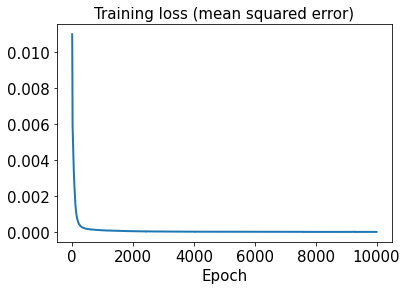

In [27]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

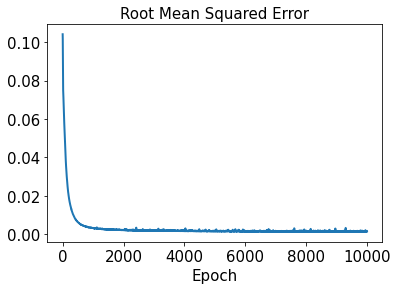

In [28]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [29]:
test_results = sd.evaluate(x_train)

13/13 [==============================] - 0s 1ms/step - loss: 2.2384e-05 - rmse: 0.0000e+00


In [30]:
decoded_train = sd.predict(x_train)

In [31]:
decoded_test = sd.predict(x_test)

In [32]:
error_train_abs = np.abs(decoded_train - y_train)

In [33]:
error_test_abs = np.abs(decoded_test - y_test)

In [34]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.00022811082


In [35]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.007108275


In [36]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
#print(l2_error_train_list)

In [37]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
#print(l2_error_test_list)

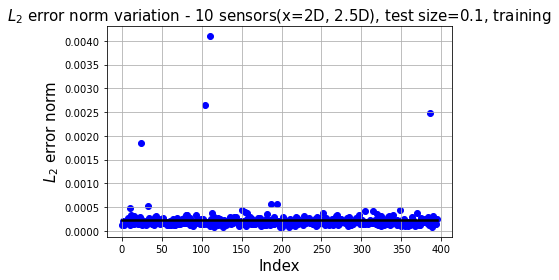

In [38]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - 10 sensors(x=2D, 2.5D), test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

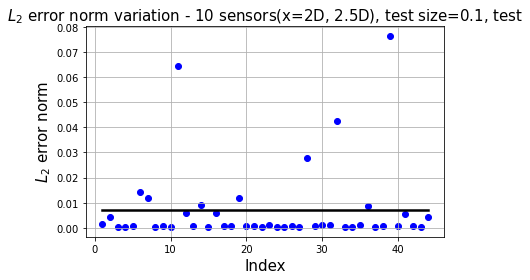

In [39]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - 10 sensors(x=2D, 2.5D), test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

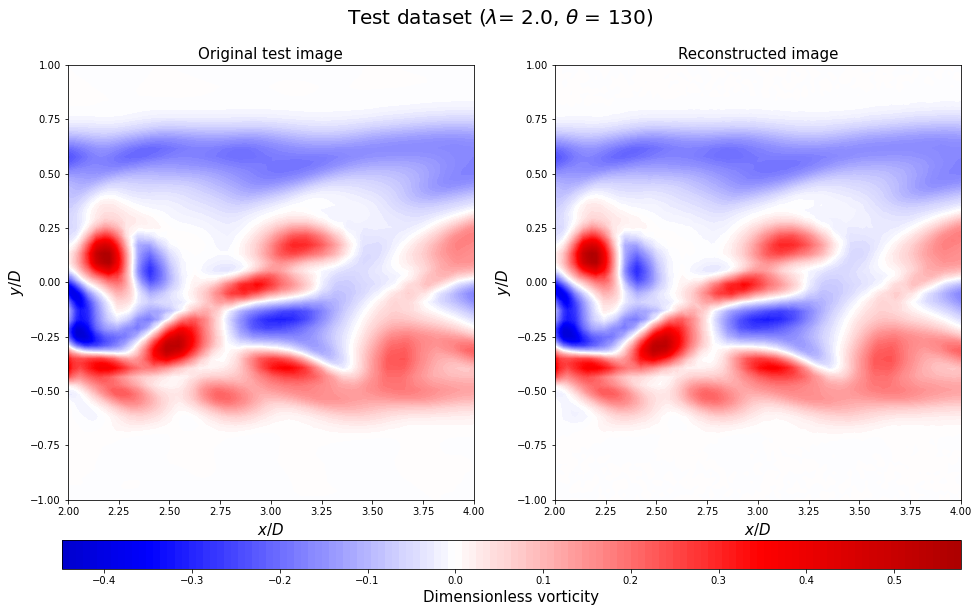

In [40]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

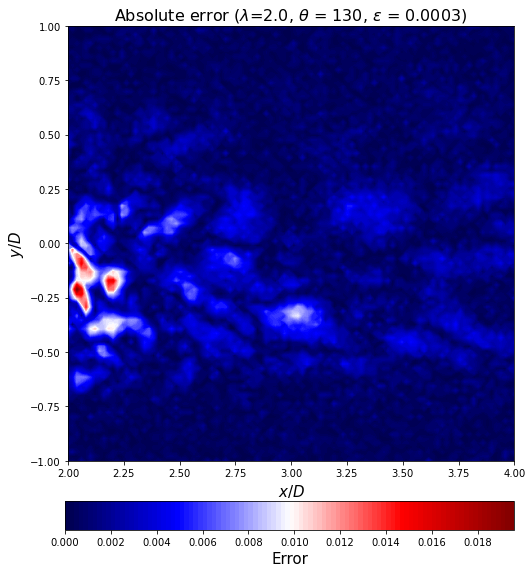

In [41]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()